# Import Libraries

In [100]:
# Import required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)


# To ignore warnings

import warnings
warnings.filterwarnings("ignore")

In [101]:
# Reading the csv file and nameing the DataFrame.

df = pd.read_csv(r'C:\Users\Mohannad\Documents\DS_course_project\data\weather-sa-2017-2019-clean.csv')


In [102]:
# Check How many rows and columns in the data set
df.shape

(249023, 15)

In [103]:
#view the datset
df

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249018,2848,Jawf,30 April 2019,19:00,2019,4,30,19,0,Passing clouds,32,19,14%,1014.0,-1
249019,2849,Jawf,30 April 2019,20:00,2019,4,30,20,0,Passing clouds,29,9,22%,1015.0,-1
249020,2850,Jawf,30 April 2019,21:00,2019,4,30,21,0,Passing clouds,27,7,24%,1016.0,-1
249021,2851,Jawf,30 April 2019,22:00,2019,4,30,22,0,Clear,26,0,26%,1017.0,16


In [104]:
# Explore the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  249023 non-null  int64  
 1   city        249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 28.5+ MB


In [105]:
# Checking for duplicated rows
print("Number of duplicate rows: ", sum(df.duplicated()))


Number of duplicate rows:  0


In [106]:

# Dropping irrelevant columns
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


In [107]:
# Check for missing values

df.isnull().sum()

city           0
date           0
time           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

In [108]:
# Filling missing values with forward and backward filling
df = df.fillna(method='ffill').fillna(method='bfill')

In [110]:
# Remove the (%) form the 'humidity' column, then Divide values by 100
# Then, Convert the 'humidity' column to int

df['humidity'] = df['humidity'].str.replace('%',' ')
df['humidity'] = df['humidity'].astype('float')/100
df.head()


AttributeError: Can only use .str accessor with string values!

In [111]:
# Summary Statistics
df.describe()

,year,month,day,hour,minute,temp,wind,humidity,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000
mean,2017.710007,6.050694,15.691081,12.536890,0.131108,24.722624,12.957104,0.375527,1015.452557,11.053453
std,0.706113,3.521591,8.787958,6.910254,1.970710,8.880913,8.711619,0.235929,6.973451,7.053005
min,2017.000000,1.000000,1.000000,1.000000,0.000000,-4.000000,-1.000000,0.000000,904.000000,-1.000000
25%,2017.000000,3.000000,8.000000,7.000000,0.000000,18.000000,7.000000,0.170000,1011.000000,5.000000
50%,2018.000000,6.000000,16.000000,13.000000,0.000000,24.000000,11.000000,0.320000,1016.000000,16.000000
75%,2018.000000,9.000000,23.000000,19.000000,0.000000,31.000000,19.000000,0.550000,1021.000000,16.000000
max,2019.000000,12.000000,31.000000,24.000000,59.000000,50.000000,163.000000,1.000000,1101.000000,161.000000


In [112]:
# Categorical Summary Statistics
df.describe(exclude="number")

,city,date,time,weather
count,249023,249023,249023,249023
unique,13,850,710,81
top,Jawf,24 November 2018,07:00,Clear
freq,20352,321,10415,98827


In [113]:
# summary statistics of the temprature degree for each city
df.groupby(['city'])['temp'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Assir,13488.0,20.257414,5.668614,3.0,16.0,20.0,24.0,35.0
Baha,19959.0,23.468110,6.775876,4.0,18.0,24.0,29.0,39.0
EP,18505.0,27.215077,8.936535,3.0,20.0,27.0,34.0,50.0
Hail,20121.0,25.927837,10.083176,-2.0,18.0,25.0,34.0,48.0
Jawf,20352.0,23.101268,10.229671,-4.0,15.0,23.0,31.0,46.0
Jazan,19829.0,20.711735,5.855156,3.0,16.0,21.0,25.0,37.0
Madina,19965.0,28.708740,8.336009,6.0,22.0,29.0,35.0,47.0
Mecca,20268.0,29.023239,4.607044,16.0,26.0,29.0,32.0,49.0
Najran,19847.0,20.692951,5.863598,2.0,16.0,21.0,25.0,37.0


<AxesSubplot:>

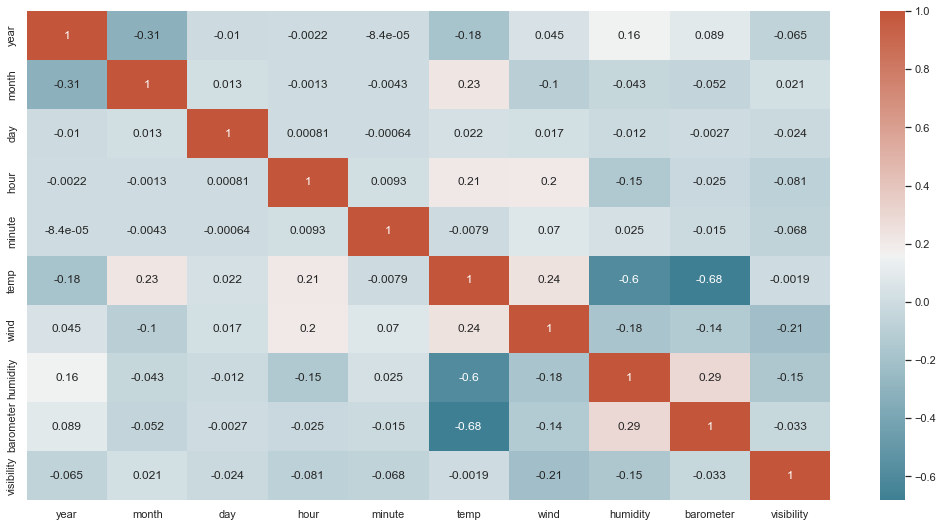

In [114]:
# calculate correlation matrix
corr = df.corr() # plot the heatmap
plt.figure(figsize=(18,9))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:>

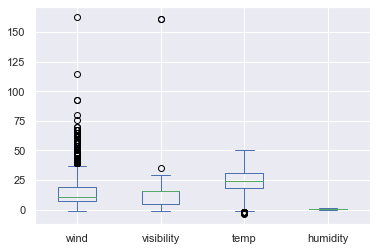

In [115]:
# Creating box plot to check for extreme value

df[['wind', 'visibility', 'temp', 'humidity']].plot(kind='box')

In [116]:
# Derecting outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year           1.00
month          6.00
day           15.00
hour          12.00
minute         0.00
temp          13.00
wind          12.00
humidity       0.38
barometer     10.00
visibility    11.00
dtype: float64


In [117]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(244644, 14)

<AxesSubplot:>

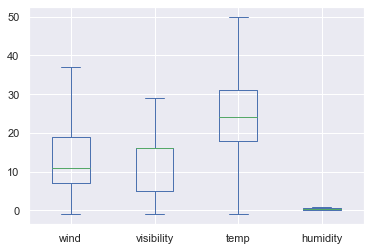

In [118]:
# Creating box plot to check for extreme value

df[['wind', 'visibility', 'temp', 'humidity']].plot(kind='box')

In [121]:
# using groupby function with aggregation to get mean, min and max values for temprature per city
result = df.groupby('city').agg({'temp': ['mean', 'min', 'max']})
  
result

temp        
                       mean min max
city                               
Assir             20.246199   3  35
Baha              23.426270   4  39
EP                26.315668   3  50
Hail              25.939863  -1  48
Jawf              23.145939  -1  46
Jazan             20.696945   3  37
Madina            28.681193   6  47
Mecca             29.001390  16  49
Najran            20.677181   2  37
Northern boarder  25.010261  -1  47
Qassim            25.971319  -1  48
Riyadh            27.960054   2  47
Tabuk             22.612573  -1  45

In [122]:
# Average  Temprature  for each of the city
df.groupby([df["year"], "city"])["temp"].mean()

year  city            
2017  Assir               21.259298
      Baha                24.250769
      EP                  27.214029
      Hail                27.490411
      Jawf                24.479765
      Jazan               21.290364
      Madina              30.084225
      Mecca               29.356342
      Najran              21.265524
      Northern boarder    25.415079
      Qassim              27.494584
      Riyadh              30.244958
      Tabuk               23.541445
2018  Assir               18.423327
      Baha                23.768581
      EP                  27.412666
      Hail                26.921862
      Jawf                24.381248
      Jazan               20.804371
      Madina              29.308323
      Mecca               29.753208
      Najran              20.806097
      Northern boarder    26.006909
      Qassim              26.899520
      Riyadh              29.208591
      Tabuk               23.914792
2019  Assir               18.553829
     

# Data Visualization

In [124]:
# Plot each numirical feature in a historgram

# df.hist(figsize=(14,14), xrot=45)
# plt.show()

In [63]:
# plt.figure(figsize = [20,5]) #[width, height]
# df.groupby(['year'])['temp'].mean().plot()
# plt.title( 'Average Annual Temprature in Saudi Arabia')
# plt.ylabel('Average Temprature in mm')
# plt.xlabel('Year')
# plt.xticks(rotation=45)
# plt.show()

In [64]:
# sns.set_style('whitegrid')
# plt.subplots(figsize=(20,8))
# plt.title("Annual Average Temprature per City", fontsize=34)
# sns.barplot(x="city", y="temp", hue='year', data=df)
# plt.xticks(rotation = 45)
# plt.xticks(fontsize=18)
# plt.ylabel("Average Temprature",fontsize=20)
# plt.xlabel("City",fontsize=20)

In [65]:
# plt.figure(figsize=[30,10])
# plt.title('Maximum Yearly Temperature Per City', fontsize=22)
# sns.barplot(data=df, x='city', y='temp', hue='year', estimator=np.max)
# plt.ylabel('Temperature', fontsize=16)
# plt.xlabel('City', fontsize=16)
# plt.xticks(fontsize=16)
# plt.show()

# Data Modelding

In [66]:
# # Plot Regression Line

# sns.lmplot(x = "month", y = "temp", data = df, height = 5.2, aspect = 2);

In [125]:
# Import required libraries for Machine Learning

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [126]:
train, test = train_test_split(df, test_size = 0.2, random_state=42)

In [127]:
# OrdinalEncoder is for encode categorical features as an integer array 
# Create our Ordinal Encoder object
ordinal = OrdinalEncoder()

# The categorical features
columns_to_enc = ['year', 'month', 'day', 'hour']

# Ordinal encode the columns
ordinal_train = ordinal.fit_transform(train[columns_to_enc])
ordinal_test = ordinal.transform(test[columns_to_enc])

# Convert ordinal_train and ordinal_test to a dataframes
train_ordinal = pd.DataFrame(ordinal_train, columns = columns_to_enc)
test_ordinal = pd.DataFrame(ordinal_test, columns = columns_to_enc)

In [129]:
# StandardScaler is for standardize features by removing the mean and scaling to unit variance
# Create our Standard Scaler object
scaler = StandardScaler()

# Features that need to Scale
columns_to_scale = ['temp', 'wind', 'humidity', 'barometer', 'visibility']

# Standard Scaling the columns
scaled_train = scaler.fit_transform(train[columns_to_scale])
scaled_test = scaler.transform(test[columns_to_scale])

# Convert scaled_train and scaled_test to a dataframes
train_scaled = pd.DataFrame(scaled_train, columns = columns_to_scale)
test_scaled = pd.DataFrame(scaled_test, columns = columns_to_scale)

In [130]:
# OneHotEncoder is for encode categorical features as a one-hot numeric array
# Create our One Hot Encoder object

one_hot = OneHotEncoder()

# Features that need to One Hot encode
columns_to_onehot = ['city']

# One Hot encode the columns
one_hot_train = one_hot.fit_transform(train[columns_to_onehot]).toarray()
one_hot_test = one_hot.fit_transform(test[columns_to_onehot]).toarray()

# The new column names after One Hot encode
column_names = ['Qassim', 'Hail', 'Madina', 'Eastren Province', 'Riyadh', 'Mecca', 'Tabuk', 'Assir', 'Northern boarder', 'Jazan', 'Najran', 'Baha', 'Jawf']

# Convert one_hot_train and one_hot_test to a dataframes
train_one_hot = pd.DataFrame(one_hot_train, columns = column_names)
train_one_hot = pd.DataFrame(one_hot_test, columns = column_names)



In [131]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, roc_auc_score
# Importing train-test-split 
from sklearn.model_selection import train_test_split





# separate features from labels
x = df[['visibility', 'barometer', 'wind']]
y = df["temp"]


# split the data
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=123)


# fit a KNN regression model with 10 neighbors
knn = KNeighborsRegressor(n_neighbors=10)
m1 = knn.fit(x_train, y_train)

m1

KNeighborsRegressor(n_neighbors=10)

In [68]:
pred = m1.predict(x_train)

# compute MSE
mse = mean_squared_error(y_train, pred)
mse

38.14810025004361

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
print("MSE:", metrics.mean_squared_error(y_hat, y))
print("R^2:", metrics.r2_score(y_h, y))
print("var:", y.var()

In [ ]:


# define df_train as independent and df_target as dependent
df_train = df[['visibility', 'barometer', 'wind']]
df_target = df['temp']

# split the data
X_train, X_test, y_train, y_test = train_test_split(df_train, df_target, test_size=.30)

# MA example
from statsmodels.tsa.arima.model import ARIMA
# define and train and the model
model = ARIMA(df_target)
model.fit(X_train, y_train)



# # # fit model
# model = ARIMA(data, order=(0, 0, 1))
# model_fit = model.fit(x,y)
# # # make prediction
# yhat = model_fit.predict(len(data), len(data))
# print(yhat)



In [ ]:
# Putting feature variable to X
X = df[['wind', 'barometer', 'visibility']]

# Putting response variable to y
y = df['temp']

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 99)
X_train.head()

In [ ]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

# AR example
from statsmodels.tsa.ar_model import AutoReg

# fit model
model = AutoReg(df, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(df), len(df))
print(yhat)


In [ ]:
# Importing linear regression from sklearn library
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X_train = df[['year', 'month', 'day', 'wind', 'barometer', 'visibility']]
y_train = df[['temp']]

model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

In [ ]:
# Let's check the evaluation metrics of our  model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn import metrics


    
# Making predictions
y_pred = model.predict(X_test)
y_pred




In [ ]:

plt.figure(figsize=(15,6))
plt.plot(X_train, y_train,'o', alpha = 0.5)
plt.plot(X_train, y_pred, 'r', alpha = 0.5)
plt.xlabel('month')
plt.ylabel('temp')
print("MSE:", metrics.mean_squared_error(y_pred, y_train))
print("R^2:", metrics.r2_score(y_pred, y_train))
print("var:", y.var())

In [ ]:
X = np.array([2030]).reshape(-1,1)
X